In [21]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [22]:
df = pd.read_csv("haydn_group6_df.csv") 
sears = pd.read_csv("sears_df.csv") 


In [23]:
df = df.append(sears)
df

,harm,voice4,voice3,voice2,voice1,beat,meter,onset_strength,beat_strength,LABEL,similarity
0,I,4G,4d 4b,4gg 4b 4d,4gg 4b 4d,1.0,M2/2,4.0,strong beat,1.0,0.285714
1,V7,4D,4d 4cc,4ff# 4d 4a,4aa 4dd 4d,3.0,M2/2,6.0,weak beat,1.0,0.285714
2,I,4GG,4d 4b,4gg 4b 4d,4dd 4bb 4d,1.0,M2/2,4.0,strong beat,1.0,0.500000
3,I,4d,4r,4r,4r,4.0,M2/2,0.0,off beat,0.0,0.000000
4,I,4B,1r,1r,1r,1.0,M2/2,1.0,strong beat,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4861,V7,1GG#],2F#\,2B#/,8g#/L],3.0,M4/4,2.0,strong beat,1.0,1.000000
4862,V7,1GG#],2F#\,2B#/,8f#/,3.5,M4/4,1.0,off beat,0.0,0.857143
4863,V7,1GG#],2F#\,2B#/,8e#/,4.0,M4/4,1.0,weak beat,0.0,0.750000
4864,V7,1GG#],2F#\,2B#/,8d#/J,4.5,M4/4,1.0,off beat,0.0,0.000000


In [24]:
df = df[["onset_strength", "beat_strength","similarity","LABEL"]]
df.rename(columns={'onset_strength':'onset_synchrony'}, inplace=True)

# we made a mistake when process similarity data, instead of comparing current slice and the next slice, we changed
# to comparing current slice and the previous slice, by shifting the similarity column
df.similarity = df.similarity.shift(periods=1, fill_value=0)
df

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,onset_synchrony,beat_strength,similarity,LABEL
0,4.0,strong beat,0.000000,1.0
1,6.0,weak beat,0.285714,1.0
2,4.0,strong beat,0.285714,1.0
3,0.0,off beat,0.500000,0.0
4,1.0,strong beat,0.000000,0.0
...,...,...,...,...
4861,2.0,strong beat,0.333333,1.0
4862,1.0,off beat,1.000000,0.0
4863,1.0,weak beat,0.857143,0.0
4864,1.0,off beat,0.750000,0.0


In [25]:
print(df.dtypes)

onset_synchrony    float64
beat_strength       object
similarity         float64
LABEL              float64
dtype: object


### Types of varibles
Independent variable: <br>
LABEL - binary<br>

Dependent variables: <br>
onset_synchrony - ordinal<br>
beat_strength - categorical<br>
similarity - continuous<br>


In [26]:
# change variable types
df['onset_synchrony'] = df.onset_synchrony.astype(int)
#df['onset_strength'] = pd.Categorical(df.onset_strength)
df['beat_strength'] = pd.Categorical(df.beat_strength)
df['LABEL'] = df.LABEL.astype(int)
# change onset strength 

print(df.dtypes)

onset_synchrony       int64
beat_strength      category
similarity          float64
LABEL                 int64
dtype: object


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

## Dataframe descriptive stats

#### For non-categorical data

In [27]:
df.describe()

,onset_synchrony,similarity,LABEL
count,28274.000000,28274.000000,28274.000000
mean,1.492113,0.552387,0.228478
std,1.040079,0.361441,0.419860
min,0.000000,0.000000,0.000000
25%,1.000000,0.285714,0.000000
50%,1.000000,0.666667,0.000000
75%,2.000000,0.857143,0.000000
max,7.000000,1.000000,1.000000


#### For categorical data

In [20]:
Counter(df.beat_strength)

Counter({'strong beat': 6517, 'weak beat': 5103, 'off beat': 16654})

### Distribution plot

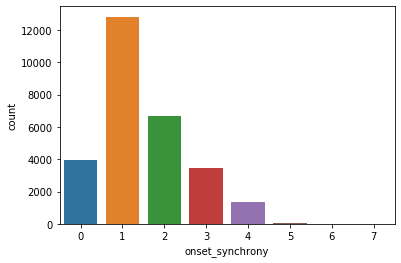

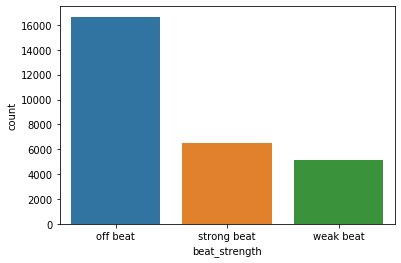

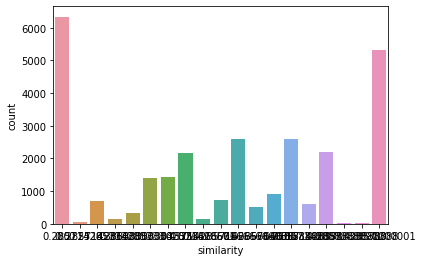

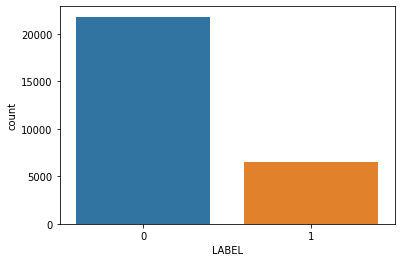

In [30]:
for column in df.columns:
    plt.figure()             
    sns.countplot(df[column])

### Correlation Check

#### Visualization - scatter plot matrix to explore the relationship between different variables

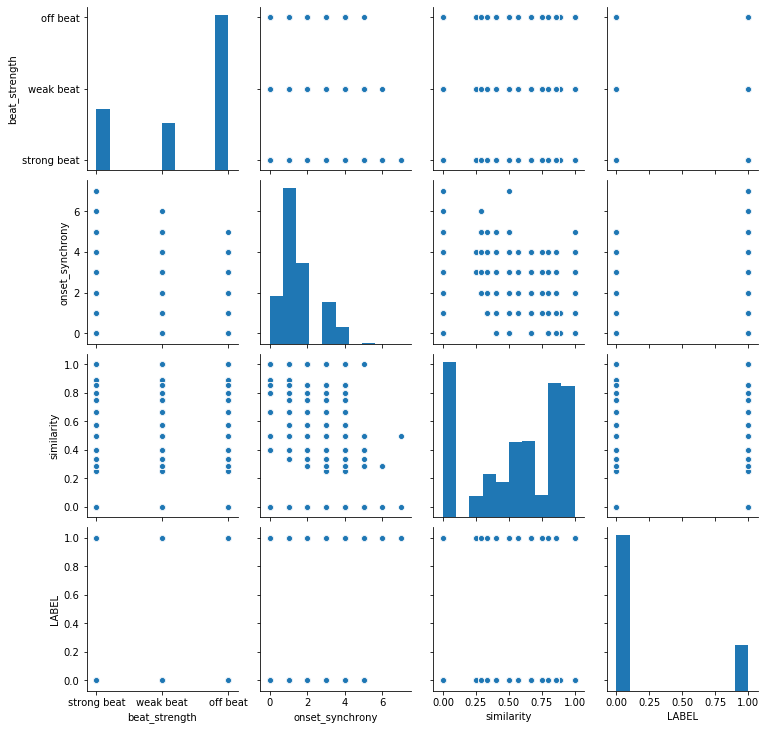

In [8]:
sns.pairplot(df, vars = ['beat_strength', 'onset_synchrony', 'similarity', "LABEL"])

#### Correlation for Multicollinearity Check
Before we proceed to logistic regression we need to check one assumption that the independent variables (non-categorical) should be free from any correlation. 

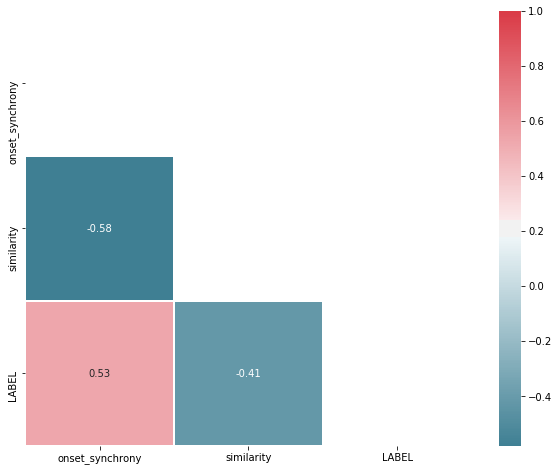

In [9]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

## Model Fitting

In [10]:
logit = smf.logit(formula='LABEL ~ onset_synchrony + C(beat_strength) + similarity ', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.274290
         Iterations 8


In [11]:
print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:                  LABEL   No. Observations:                28274
Model:                          Logit   Df Residuals:                    28269
Method:                           MLE   Df Model:                            4
Date:                Wed, 02 Dec 2020   Pseudo R-squ.:                  0.4896
Time:                        13:12:39   Log-Likelihood:                -7755.3
converged:                       True   LL-Null:                       -15195.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -4.1171      0.074    -55.646      0.000      -4.262      -3.972
C(beat_strength)[T.strong beat]     3.3884      0.051     65.929    

In [12]:
# p values
logit.pvalues

Intercept                           0.000000e+00
C(beat_strength)[T.strong beat]     0.000000e+00
C(beat_strength)[T.weak beat]      3.626556e-243
onset_synchrony                     0.000000e+00
similarity                          6.881679e-85
dtype: float64

Some metrics have different names:<br>

Pseudo R-squ. is a substitute for R-squared. It also measures the amount of outcome variable variance, which is explained by the model. Pseudo R-squared can be interpreted in the same way as R-squared; the higher the better, with a maximum of 1.<br>

LL-null and LLR p-value are equivalent to the F-statistic and F-proba of linear regression, and are interpreted in the same manner for comparing models.
The higher the value for LL-null the better. Low values for LLR p-value (<0.05) mean you can reject the null hypothesis that the model based on the intercept (all coefficients = 0) is better than the full model. Hence, our model is relevant.<br>

The z-statistic plays the same role as the t-statistic in the linear regression output and equals the coefficient divided by its standard error. The lower, the better.<br>


#### Interpreting the results
The model is fitted using the Maximum Likelihood Estimation (MLE) method. The pseudo-R-squared value is 0.4896 which is overall good. The Log-Likelihood difference between the null model (intercept model) and the fitted model shows significant improvement (Log-Likelihood ratio test).<br>


The coefficient table showed that on strong beat, on weak beat, onset_synchrony, and similarity all have significant influence (p-values < 0.05; 5% significance level) on admission. The coefficients are positive and in log-odds terms. The interpretation of the model coefficients could be as follows:<br>

Each one-unit increase in onset_synchrony will increase the log odds of detemining a chord "changes" on the slice by 1.0054.<br>

Each one-unit increase in similarity will increase the log odds of detemining a chord "changes" on the slice by -1.3127. In another word, Each one-unit increase in similarity will decrease the log odds of detemining a chord "changes" on the slice by -1.3127 <br>

In addition, for beat_strength variable we could say compared to an onset slice that off beat, an onset slice that on strong beat has 3.3884 log odds of detemine a chord "changes" on the slice holding other variables constant, 
and an onset slice that on weak beat has 1.8327 log odds of detemine a chord "changes" on the slice holding other variables constant.<br>


### Visualize how the probability of a chord changes on an onset slice changes with different features values (non-categorical)

#### Probability that a chord changes on an onset slice vs. onset synchrony value

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Probability that a chord changes on an onset slice')

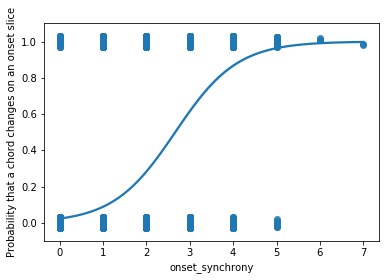

In [13]:
sns.regplot(x = "onset_synchrony", y = "LABEL", data = df,
logistic = True, y_jitter = .03)
plt.ylabel("Probability that a chord changes on an onset slice")

### Probability that a chord changes on an onset slice vs. similarity value

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Probability of a chord changes on an onset slice')

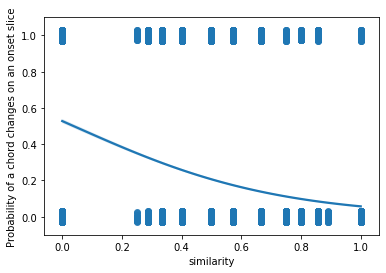

In [14]:
sns.regplot(x = "similarity", y = "LABEL", data = df,
logistic = True, y_jitter = .03)
plt.ylabel("Probability of a chord changes on an onset slice")